    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


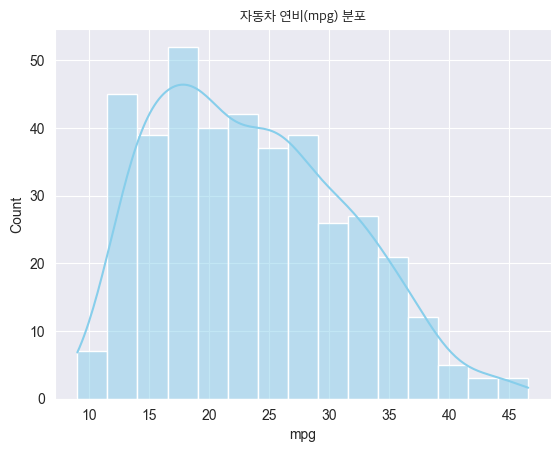

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name mpg_category  
0          70    usa  chevrolet chevelle malibu          Low  
1          70    usa          buick skylark 320          Low  
2          70    usa         plymouth satellite          Low  
3          70    usa              amc rebel sst          Low  
4          70    usa                ford torino          Low  


/var/folders/x_/xf7w4xhx6kl03__yxdgdfl9m0000gn/T/ipykernel_35787/1618756054.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mpg, x="mpg_category", palette="viridis")


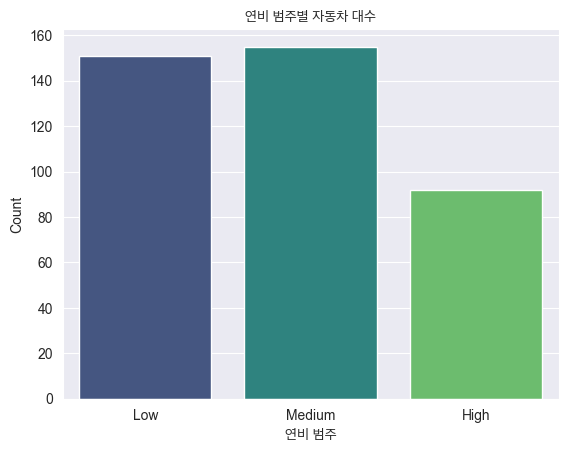

In [4]:
# Seaborn의 mpg(Miles Per Gallon) 데이터셋을 활용하여
# 진행할 수 있는 간단한
#
# 예제 1: 자동차 연비(mpg)의 분포 및 구간별 시각화
#
# 문제 설명
# mpg 데이터셋을 불러옵니다.
# 자동차 연비(mpg)의 전반적인 분포를 히스토그램으로 시각화하고,
# 커널 밀도 곡선(KDE)을 함께 그려보세요.


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path=  "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# # 1. mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")
print(mpg.head())

# 2. 자동차 연비(mpg) 분포 확인 (히스토그램 + KDE)
sns.set_style("darkgrid")
sns.histplot(mpg["mpg"], kde=True, color="skyblue", bins=15)
plt.title("자동차 연비(mpg) 분포", fontproperties=font_prop)
plt.xlabel("mpg")
plt.ylabel("Count")
plt.show()
#
# 연비를 범주화(예: ‘저연비’, ‘중연비’, ‘고연비’)해서 막대 그래프로 시각화해보고,
# 각 범주에 속하는 자동차가 몇 대인지 확인하세요.
#

# # 3. 연비 범주화 (예시 기준: 0~20=저연비, 20~30=중연비, 30이상=고연비)
def categorize_mpg(x):
    if x < 20:
        return "Low"
    elif x < 30:
        return "Medium"
    else:
        return "High"

mpg["mpg_category"] = mpg["mpg"].apply(categorize_mpg)
print(mpg.head())

# 범주별 자동차 수 시각화
sns.countplot(data=mpg, x="mpg_category", palette="viridis")
plt.title("연비 범주별 자동차 대수", fontproperties=font_prop)
plt.xlabel("연비 범주", fontproperties=font_prop)
plt.ylabel("Count")
plt.show()

#
#
#



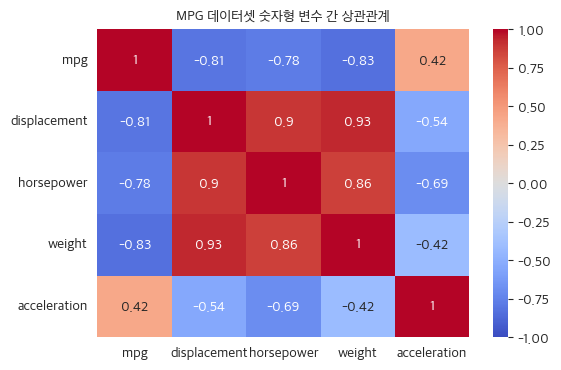

In [5]:
# 예제 2: 숫자형 변수 간 상관관계 분석 (Heatmap)
#
# 문제 설명
# mpg 데이터셋에서 숫자형 열
# (예: mpg, displacement, horsepower, weight, acceleration)만
# 골라서 새로운 데이터프레임을 생성합니다.
# (결측치 제거 : dropna())
#
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path=  "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")



# 이들 변수 간 상관계수를 구한 뒤, Seaborn의 heatmap으로 시각화해보세요.
# 상관계수를 해석하고, 어떤 변수들이 연비(mpg)와 밀접한 관계가 있는지 논의해보세요.
# 2. 숫자형 변수 추출
num_cols = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
mpg_numeric = mpg[num_cols].dropna()  # 결측치 제거

# 3. 상관계수 계산
corr_matrix = mpg_numeric.corr()

# 4. 히트맵 시각화
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("MPG 데이터셋 숫자형 변수 간 상관관계", fontproperties=font_prop)
plt.show()
#

#

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-

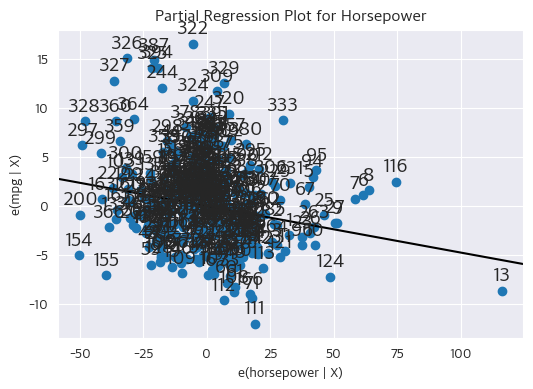

In [6]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot)
# 문제 설명
# 종속 변수를 mpg로 설정하고, 독립 변수로 horsepower, weight를 사용하여
# 선형 회귀 모델을 적합합니다.
# (결측치 제거 : dropna())
# 모델 요약 결과를 확인하고, horsepower가 연비에 미치는 순수한 영향을
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg").dropna(subset=["mpg", "horsepower", "weight"])
print(mpg.head())

# 2. 종속 변수, 독립 변수 분리
X = mpg[["horsepower", "weight"]]
y = mpg["mpg"]

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())

# 5. 부분 회귀 플롯 (horsepower의 순수 영향)
fig, ax = plt.subplots(figsize=(6,4))
plot_partregress("mpg", "horsepower", ["weight"], data=mpg, ax=ax)
plt.title("Partial Regression Plot for Horsepower")
plt.show()

# 부분 회귀 플롯으로 시각화하세요.